#Exploratory Data Analysis on USA Accidents
- doesnot contain data of New York


###Download Datasets directly from kaggle using opendatasets Library

In [1]:
pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od
download_url = "https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents"
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sameernow
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents


100%|██████████| 653M/653M [00:08<00:00, 78.4MB/s]


#Data Prepration and Cleaning
1. Load the file using Pandas
2. Look at some information about the data and columns
3. Fix any missing or incorrect values

In [3]:
import pandas as pd

In [4]:
data_filename = "us-accidents/US_Accidents_March23.csv"
chunk_size = 100000  #number of rows per chunk
max_rows  = 4000000 #maximum number to load

chunks = pd.read_csv(data_filename,chunksize=chunk_size) # creates an iterator. divides the data into the chunk of size 100000
df_list=[] #initialize the empty list to hold the chunks
rows_loaded = 0 #counter the measure the rows the loaded

In [5]:
#process each chunks(100000) from the bundle of the chunks(7.7 million)
for chunk in chunks:
  if rows_loaded >= max_rows:
    break

  rows_to_add = min(len(chunk), max_rows-rows_loaded)
  df_list.append(chunk.iloc[:rows_to_add]) #selects only the first rows_to_add rows of the current chunk
  rows_loaded += rows_to_add


In [6]:
#the csv datas are stored in list with dividing the data in list or chunks of 1000000
#now we combine them to a single data frame using pd.concat dunction
df = pd.concat(df_list)

In [7]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [8]:

print("number of rows ",len(df))
print("Information of the dataframe")
df.info()

number of rows  4000000
Information of the dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  W

In [9]:
#descibing the data mathmatically
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,4.000000e+06,4.000000e+06,4.000000e+06,597238.000000,597238.000000,4.000000e+06,3.928890e+06,2.324250e+06,3.924110e+06,3.939339e+06,3.919468e+06,3.586747e+06,2.197980e+06
mean,2.311414e+00,3.617822e+01,-9.364887e+01,36.485415,-95.056940,3.128967e-01,6.223662e+01,5.654051e+01,6.584219e+01,2.967493e+01,9.100470e+00,7.914684e+00,1.211047e-02
std,5.101885e-01,4.854093e+00,1.658358e+01,5.069098,17.823378,1.703760e+00,1.868072e+01,2.308470e+01,2.254920e+01,8.591752e-01,2.731189e+00,5.271016e+00,1.557143e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,24.570107,-124.539056,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.338571e+01,-1.118740e+02,33.677480,-117.437796,0.000000e+00,5.000000e+01,3.900000e+01,4.900000e+01,2.954000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.552393e+01,-8.752456e+01,36.810766,-87.918250,0.000000e+00,6.400000e+01,6.100000e+01,6.800000e+01,2.991000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.003774e+01,-8.079067e+01,40.491682,-80.277200,1.000000e-02,7.600000e+01,7.500000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,49.075000,-67.109242,4.417500e+02,2.030000e+02,1.960000e+02,1.000000e+02,5.863000e+01,1.400000e+02,8.228000e+02,3.647000e+01


In [10]:
# find how many numerical data columns are there
numerical_columns = df.select_dtypes(include=['number'])
num_numerical_columns = numerical_columns.shape[1]
print(f" the number of the numbered columns in dataframe is {num_numerical_columns} ")

 the number of the numbered columns in dataframe is 13 


##Missing values and Nan Values

In [11]:
# df.isna() function gives true if the dataframe is na or false if dataframe has values
# .sum() sums up the true values colimn by column
# .sort_values(ascending= False) gives column in descending format
missing = df.isna().sum().sort_values(ascending=False)
print(missing)


End_Lat                  3402762
End_Lng                  3402762
Precipitation(in)        1802020
Wind_Chill(F)            1675750
Wind_Speed(mph)           413253
Visibility(mi)             80532
Weather_Condition          79223
Humidity(%)                75890
Temperature(F)             71110
Wind_Direction             67611
Pressure(in)               60661
Weather_Timestamp          49355
Airport_Code                8290
Nautical_Twilight           4661
Civil_Twilight              4661
Sunrise_Sunset              4661
Astronomical_Twilight       4661
Timezone                    3276
Street                      3020
Zipcode                      652
City                          96
Description                    5
No_Exit                        0
Severity                       0
Start_Time                     0
End_Time                       0
Turning_Loop                   0
Traffic_Signal                 0
Traffic_Calming                0
Stop                           0
Station   

In [12]:
#we know percentage is number/total_number * 100
missing_percentage = (missing/len(df))
missing_percentage

,0
End_Lat,0.850691
End_Lng,0.850691
Precipitation(in),0.450505
Wind_Chill(F),0.418938
Wind_Speed(mph),0.103313
Visibility(mi),0.020133
Weather_Condition,0.019806
Humidity(%),0.018972
Temperature(F),0.017778
Wind_Direction,0.016903


End_Lat                  0.850691
End_Lng                  0.850691
Precipitation(in)        0.450505
Wind_Chill(F)            0.418938
Wind_Speed(mph)          0.103313
Visibility(mi)           0.020133
Weather_Condition        0.019806
Humidity(%)              0.018972
Temperature(F)           0.017778
Wind_Direction           0.016903
Pressure(in)             0.015165
Weather_Timestamp        0.012339
Airport_Code             0.002073
Nautical_Twilight        0.001165
Civil_Twilight           0.001165
Sunrise_Sunset           0.001165
Astronomical_Twilight    0.001165
Timezone                 0.000819
Street                   0.000755
Zipcode                  0.000163
City                     0.000024
Description              0.000001
dtype: float64


<Axes: >

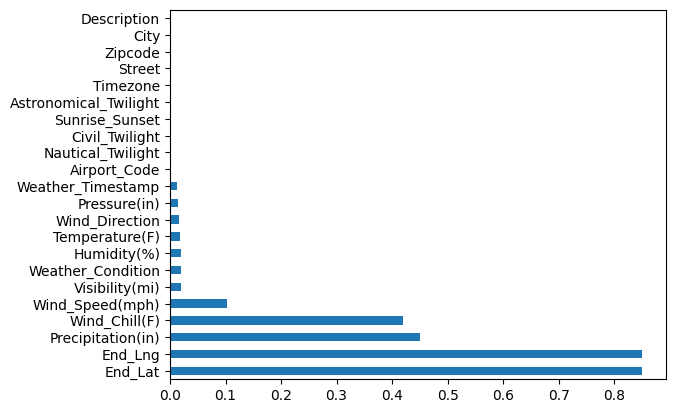

In [13]:
#now we got to remve percentages where there is no value or zero value
# missing_percentage != 0 gives the series of true if not zero
value_missing_percentage = missing_percentage[missing_percentage > 0]
print(value_missing_percentage)
value_missing_percentage.plot(kind='barh')

In [14]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

#Exploratory Analysis and Visualization
### columns we will analyze
1. City
2. County
3. Start time, End Time
4. Sart ltd ,start lgt
5. Temperature
6. Weather Condition

###City Analysis


In [15]:
#Cities Analysis
# number of rows where there are unique cities or number of different cities
unique_city = df.City.unique()
len(unique_city)

12442

In [16]:
#we cannot analyze all 12442 cities. So we look for Top cities with most Accident
cities_by_accident = df.City.value_counts()
cityPlot = cities_by_accident[:20]

In [17]:
'New York' in df.City
'NY' in df.State

False

<Axes: ylabel='City'>

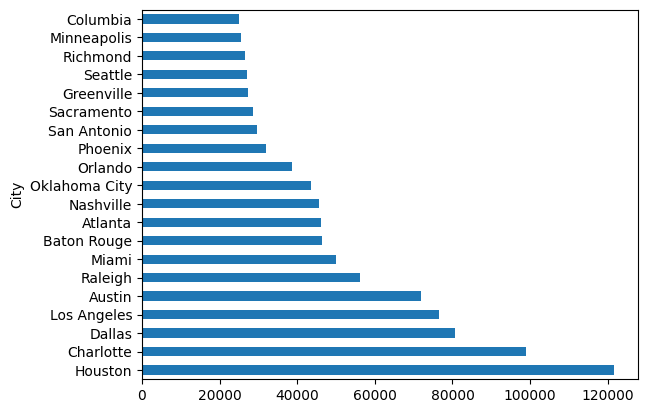

In [18]:
cityPlot.plot(kind='barh')

In [19]:
import seaborn as sns
sns.set_style('darkgrid')

<ipython-input-20-1f460903cad6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cities_by_accident)


<Axes: xlabel='count', ylabel='Density'>

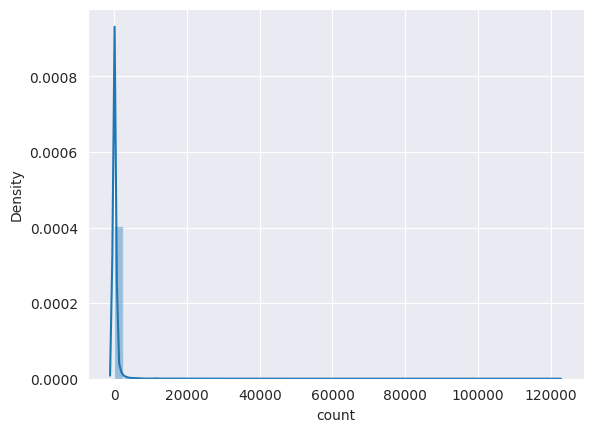

In [20]:
sns.distplot(cities_by_accident)

<Axes: xlabel='count', ylabel='Count'>

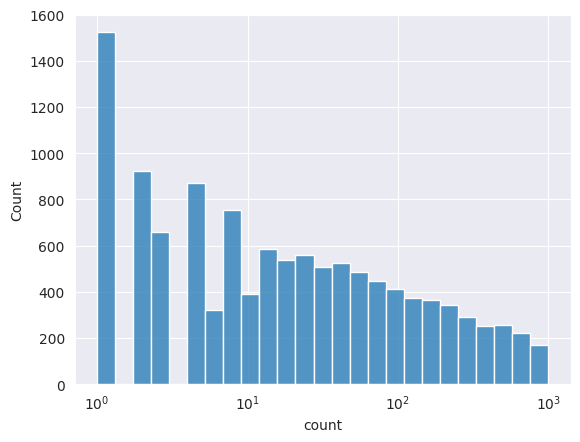

In [21]:
high_accident_cities = cities_by_accident[cities_by_accident >= 1000]
low_accident_cities = cities_by_accident[cities_by_accident < 1000]
sns.histplot(low_accident_cities, log_scale=True)# its exponentially decreasing

In [22]:

print(len(high_accident_cities)/len(unique_city))
print(len(low_accident_cities)/len(unique_city))
cities_by_accident[cities_by_accident == 1]

0.053849863366018325
0.9460697637035846


,count
City,
Turkey,1
Frazer,1
Lake Junaluska,1
Christopher,1
Wauregan,1
...,...
Broad Channel,1
Midwest,1
Dugspur,1


###Start Time


In [35]:
df.Start_Time.head()

,Start_Time
0,2016-02-08 05:46:00
1,2016-02-08 06:07:59
2,2016-02-08 06:49:27
3,2016-02-08 07:23:34
4,2016-02-08 07:39:07


In [40]:
# Try using format='ISO8601' to handle potential variations in datetime formats.
df.Start_Time = pd.to_datetime(df.Start_Time, format='ISO8601', errors='coerce')

# Alternatively, you can try format='mixed' to infer the format individually for each element.
# This might be helpful if the format isn't consistent throughout the column.
#pd.to_datetime(df.Start_Time, format='mixed', errors='coerce')

# errors='coerce' will replace invalid parsing results with NaT (Not a Time) instead of raising an error.
# This can be useful for identifying problematic rows that require manual adjustments.

In [39]:
nat_rows = df[df.Start_Time.isna()]
print(nat_rows)

Empty DataFrame
Columns: [ID, Source, Severity, Start_Time, End_Time, Start_Lat, Start_Lng, End_Lat, End_Lng, Distance(mi), Description, Street, City, County, State, Zipcode, Country, Timezone, Airport_Code, Weather_Timestamp, Temperature(F), Wind_Chill(F), Humidity(%), Pressure(in), Visibility(mi), Wind_Direction, Wind_Speed(mph), Precipitation(in), Weather_Condition, Amenity, Bump, Crossing, Give_Way, Junction, No_Exit, Railway, Roundabout, Station, Stop, Traffic_Calming, Traffic_Signal, Turning_Loop, Sunrise_Sunset, Civil_Twilight, Nautical_Twilight, Astronomical_Twilight]
Index: []

[0 rows x 46 columns]


In [41]:
df.Start_Time[0]

Timestamp('2016-02-08 05:46:00')

In [55]:
import matplotlib.pyplot as plt

<Axes: xlabel='Start_Time', ylabel='Percent'>

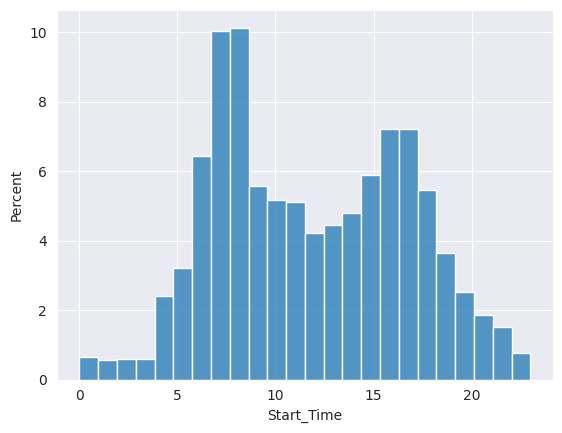

In [50]:
#Extracting only hour from datetime
sns.histplot(df.Start_Time.dt.hour,bins=24,stat='percent')

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

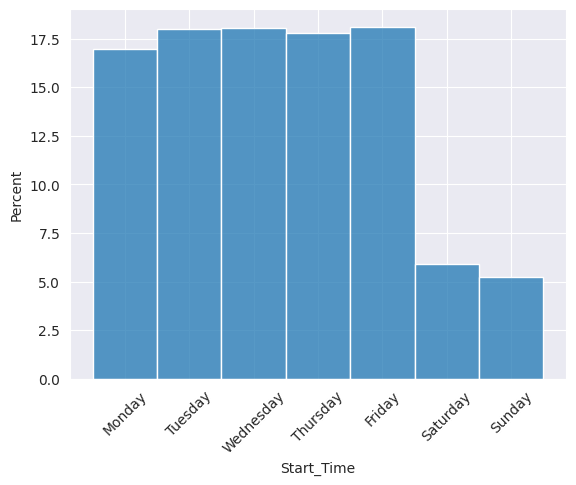

In [57]:
#extracting day of the week
sns.histplot(df.Start_Time.dt.day_name(),stat='percent')
plt.xticks(rotation=45)

### Is the accident by the hour distribution same on Weekdays and Weekends

- in weekends the highest accidents happen beetween 9am to 6pm followed by normal distribution
- whereas in weekdays the data doesnot follow normal distribution
- In weekdays, the highest accidents happens beetween the time 6am to 9 am and second hisghest is beetween 3pm to 6pm

In [58]:
Weekends_days = df.Start_Time[df.Start_Time.dt.day_name().isin(['Saturday','Sunday'])]
Weekdays_days = df.Start_Time[~df.Start_Time.dt.day_name().isin(['Saturday','Sunday'])]

<Axes: xlabel='Start_Time', ylabel='Percent'>

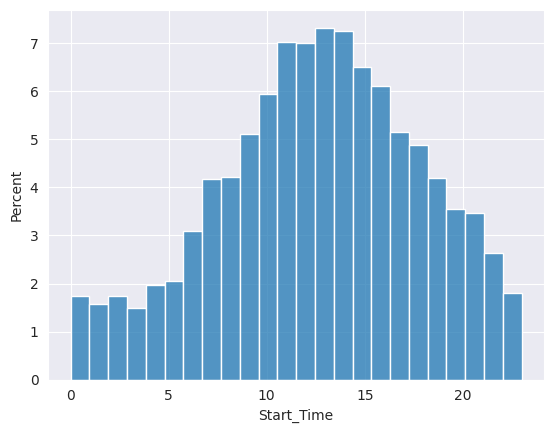

In [60]:
sns.histplot(Weekends_days.dt.hour,bins=24,stat='percent')

<Axes: xlabel='Start_Time', ylabel='Percent'>

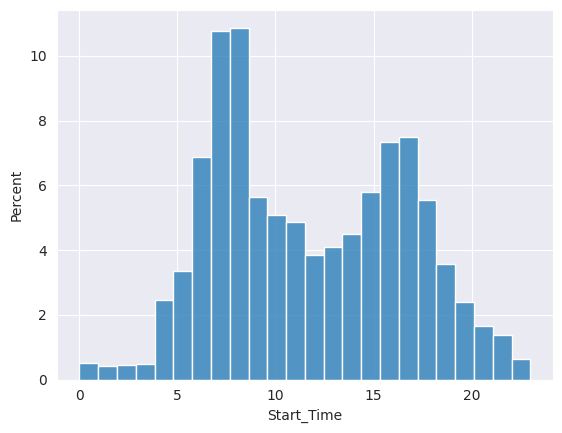

In [65]:
Monday = df.Start_Time[df.Start_Time.dt.day_name()=='Monday']
# sns.histplot(Monday.dt.hour,bins=24,stat='percent')
sns.histplot(Weekdays_days.dt.hour,bins=24,stat='percent')

###Month Analysis

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

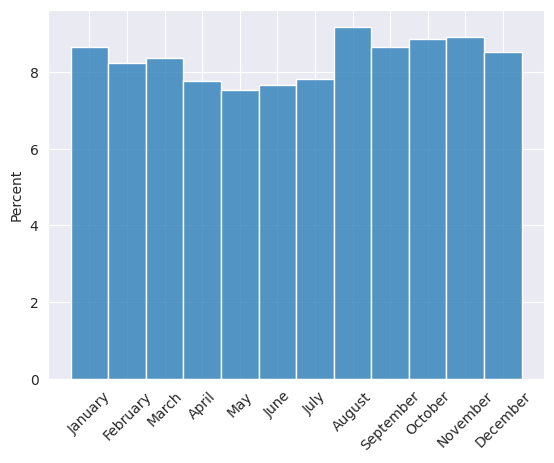

In [76]:
Month_df = pd.Categorical(
    df.Start_Time.dt.month_name(),
    categories=[ "January", "February", "March", "April", "May", "June",
        "July", "August", "September", "October", "November", "December"],
    ordered=True
    )
sns.histplot(Month_df,stat='percent')
plt.xticks(rotation=45, fontsize=10)

###Source

<Axes: ylabel='count'>

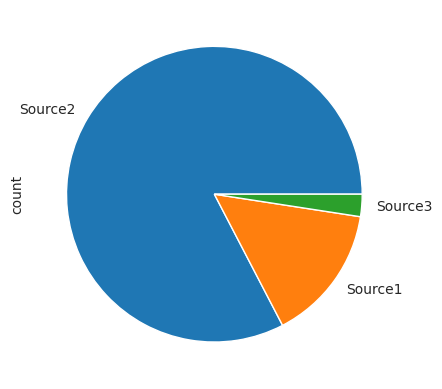

In [81]:
df.Source.value_counts().plot(kind='pie')

#Start Latitude and Longitude

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 46 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Time             datetime64[ns]
 4   End_Time               object        
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   End_Lat                float64       
 8   End_Lng                float64       
 9   Distance(mi)           float64       
 10  Description            object        
 11  Street                 object        
 12  City                   object        
 13  County                 object        
 14  State                  object        
 15  Zipcode                object        
 16  Country                object        
 17  Timezone               object        
 18  Airport_Code          

In [86]:
df.Start_Lat.head()

,Start_Lat
0,39.865147
1,39.928059
2,39.063148
3,39.747753
4,39.627781


In [85]:
df.Start_Lng.head()

,Start_Lng
0,-84.058723
1,-82.831184
2,-84.032608
3,-84.205582
4,-84.188354


<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

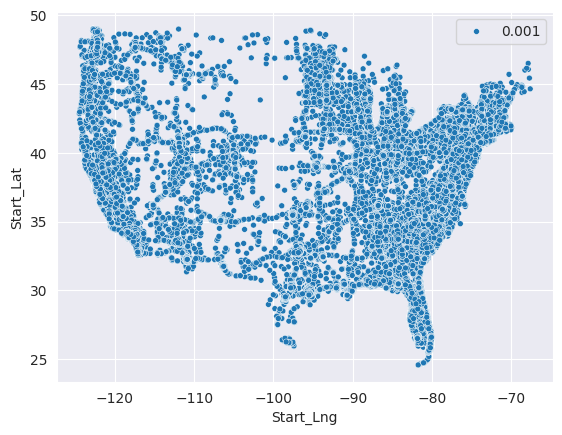

In [91]:
sample_df = df.sample(int(0.1*len(df)))
sns.scatterplot(data=sample_df,x='Start_Lng',y='Start_Lat',size=0.001)

#Plotting maps using Folium

In [92]:
import folium
from folium.plugins import HeatMap

In [95]:
lat, lon = df.Start_Lat[0],df.Start_Lng[0]

In [98]:
# map = folium.Map()
# marker = folium.Marker((lat, lon))
# marker.add_to(map)
# map

###Heatmaps

In [115]:
import folium
from folium.plugins import HeatMap
sample_df = df.sample(400)
lat_lon_pairs = list(zip(list(sample_df.Start_Lat),list(sample_df.Start_Lng)))


In [116]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

In [120]:
df.Start_Time.dt.year.value_counts().sort_index()

,count
Start_Time,
2016,410819
2017,655649
2018,725668
2019,691934
2020,470250
2021,451962
2022,518169
2023,75549


#Ask and Answer Questions
#### Whenever questions pop to mind Note here

1. which top 5 states has highest accidents. how about per capita accidents.
2. Does New York comes up in the data. IF yes then why it has lower despite having highest population
3. Among the top 100 cites with the most accident, what state do they belong or what state does frequently comes.
4. Which Time of the day accidents happen Most of the time
5. Which day of the Week the most accidents Happen
6. Which Months have Most Accidents

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 46 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Time             datetime64[ns]
 4   End_Time               object        
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   End_Lat                float64       
 8   End_Lng                float64       
 9   Distance(mi)           float64       
 10  Description            object        
 11  Street                 object        
 12  City                   object        
 13  County                 object        
 14  State                  object        
 15  Zipcode                object        
 16  Country                object        
 17  Timezone               object        
 18  Airport_Code          

#Summary and Conclusion Findouts
- No data from New York
- 5.38% cities has high accidents more than 1000
- 94.60% cities has low accidents less than 1000
- over 1500 cities has just one accidents
- the number of accidents per city decreases ecponentially
- the highest accidents happens beetween the time 6am to 9 am and second hisghest is beetween 3pm to 6pm
- the weekdays Saturday and Sunday have lowest level accidents compared to other week days

In [127]:
!ls

sample_data  us-accidents


In [128]:
!pip install gitpython

In [131]:
import os

# Replace with your repository URL
repo_url = 'https://github.com/rudysameer/EDA-On-USA-Accidents'
repo_dir = '/content/EDA-On-USA-Accidents'

# Clone the repository
!git clone {repo_url} {repo_dir}

Cloning into '/content/EDA-On-USA-Accidents'...


In [132]:
# Replace with the path of your notebook
notebook_path = '/content/USAccidentsEDA.ipynb'

# Copy the notebook to the repository directory
os.rename(notebook_path, os.path.join(repo_dir, 'USAccidentsEDA.ipynb'))